In [66]:

import random

# Describe travelling salesman problem

travelling salesman problem is used for findimg the shortest possible route .The Traveeling sales problem has several applications even in its purest formulation, such as planning, logistics.

In [67]:
import pandas as pd

In [68]:
import numpy as np

In [69]:
import matplotlib.pyplot as plt


In [70]:
data = np.loadtxt(open("TSP11.csv", "rb"), delimiter=",")


In [71]:
number_of_cities = data.shape[0]

In [72]:
number_of_cities

11

In [73]:
def cool(alpha, Tk):
    return alpha * Tk

In [74]:
def cost(tour):
    return sum(data[tour[i], tour[(i+1)%number_of_cities]] for i in range(number_of_cities))

In [75]:
tour = list(range(number_of_cities))
random.shuffle(tour)
T0 = 1

In [76]:
max_iter = 10000

In [77]:
current_tour = tour.copy()
current_cost = cost(current_tour)

In [78]:
best_tour = current_tour
best_cost = current_cost

In [79]:
Tk = T0

In [80]:
cost_list = []

In [81]:
for k in range(max_iter):
    i, j = sorted(random.sample(range(number_of_cities), 2))
    new_tour = current_tour[:i] + current_tour[i:j+1][::-1] + current_tour[j+1:]
    new_cost = cost(new_tour)

    Tk = cool(0.8, Tk)

    delta_cost = new_cost - current_cost
    if delta_cost <= 0 or np.exp(-delta_cost/Tk) > random.random():
        current_tour = new_tour
        current_cost = new_cost

    if current_cost < best_cost:
        best_tour = current_tour
        best_cost = current_cost

    cost_list.append(current_cost)

<ipython-input-81-f9e1e27a8d83>:9: RuntimeWarning: overflow encountered in double_scalars
  if delta_cost <= 0 or np.exp(-delta_cost/Tk) > random.random():


In [82]:
print("Best tour:", best_tour)

Best tour: [8, 0, 7, 4, 3, 9, 5, 2, 6, 1, 10]


In [83]:
print("Best cost:", best_cost)

Best cost: 253.0


In [84]:
print("tour",tour)
def cost(tour):
    return sum(data[tour[i], tour[(i+1)%number_of_cities]] for i in range(number_of_cities))
print("cost",cost(tour))

tour [4, 7, 0, 2, 6, 9, 5, 1, 3, 10, 8]
cost 356.0


In [85]:
def neighbour(tour):
    i, j = sorted(random.sample(range(number_of_cities), 2))
    return tour[:i] + tour[i:j+1][::-1] + tour[j+1:]
print(neighbour(tour))
    

[4, 7, 10, 3, 1, 5, 9, 6, 2, 0, 8]


In [86]:
def accept_prob(c1, c, t):
    if c1 <= c:
        return 1
    else:
        return np.exp(-(c1 - c) / t)

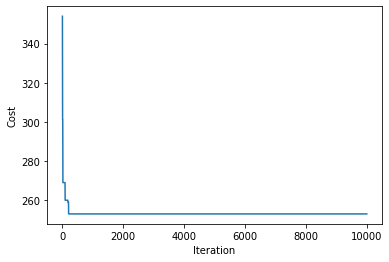

In [87]:
# plot cost function for each iteration
plt.plot(cost_list)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

**alpha = 0.9**

In [88]:
for k in range(max_iter):
    i, j = sorted(random.sample(range(number_of_cities), 2))
    new_tour = current_tour[:i] + current_tour[i:j+1][::-1] + current_tour[j+1:]
    new_cost = cost(new_tour)

    Tk = cool(0.9, Tk)

    delta_cost = new_cost - current_cost
    if delta_cost <= 0 or np.exp(-delta_cost/Tk) > random.random():
        current_tour = new_tour
        current_cost = new_cost

    if current_cost < best_cost:
        best_tour = current_tour
        best_cost = current_cost

    cost_list.append(current_cost)

<ipython-input-88-880f1d91b475>:9: RuntimeWarning: overflow encountered in double_scalars
  if delta_cost <= 0 or np.exp(-delta_cost/Tk) > random.random():


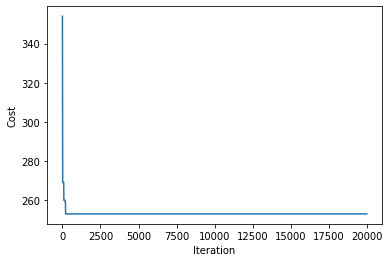

In [89]:
# plot cost function for each iteration
plt.plot(cost_list)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

# for alpha = 0.95

In [90]:
for k in range(max_iter):
    i, j = sorted(random.sample(range(number_of_cities), 2))
    new_tour = current_tour[:i] + current_tour[i:j+1][::-1] + current_tour[j+1:]
    new_cost = cost(new_tour)

    Tk = cool(0.95, Tk)

    delta_cost = new_cost - current_cost
    if delta_cost <= 0 or np.exp(-delta_cost/Tk) > random.random():
        current_tour = new_tour
        current_cost = new_cost

    if current_cost < best_cost:
        best_tour = current_tour
        best_cost = current_cost

    cost_list.append(current_cost)

<ipython-input-90-ae5516ee5dd6>:9: RuntimeWarning: overflow encountered in double_scalars
  if delta_cost <= 0 or np.exp(-delta_cost/Tk) > random.random():


In [91]:
# plot cost function for each iteration
plt.plot(cost_list)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

In [92]:
distance_matrix = np.loadtxt(open("TSP48.csv", "rb"), delimiter=",")
n_cities = distance_matrix.shape[0]

In [93]:
def cool(alpha, Tk):
    return alpha * Tk

def cost(tour):
    return sum(distance_matrix[tour[i], tour[(i+1)%n_cities]] for i in range(n_cities))

tour = list(range(n_cities))
random.shuffle(tour)
T0 = 1


maxiter = 1000


current_tour = tour.copy()
current_cost = cost(current_tour)


best_tour = current_tour
best_cost = current_cost


Tk = T0

# Iterate
cost_list = []
for k in range(maxiter):
    # Generate a random neighbouring state of the current solution and calculate its cost
    i, j = sorted(random.sample(range(n_cities), 2))
    new_tour = current_tour[:i] + current_tour[i:j+1][::-1] + current_tour[j+1:]
    new_cost = cost(new_tour)

    # Update temperature
    Tk = cool(0.99, Tk)

    # Move to new solution with some probability given by acceptance probability
    delta_cost = new_cost - current_cost
    if delta_cost <= 0 or np.exp(-delta_cost/Tk) > random.random():
        current_tour = new_tour
        current_cost = new_cost

    # Store the best solution so far
    if current_cost < best_cost:
        best_tour = current_tour
        best_cost = current_cost

    # Store cost for each iteration
    cost_list.append(current_cost)

# Print best solution and cost
print("Best tour:", best_tour)
print("Best cost:", best_cost)


Best tour: [28, 31, 38, 12, 10, 24, 13, 2, 21, 7, 37, 8, 14, 19, 27, 17, 6, 5, 26, 18, 16, 42, 29, 36, 43, 30, 35, 45, 32, 39, 0, 15, 40, 33, 22, 11, 46, 20, 23, 4, 47, 41, 9, 3, 44, 34, 25, 1]
Best cost: 47039.0
